In [3]:
##Josh Puzey
##started 9/5/2019


In [15]:
import sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import *
import warnings
import scipy
from scipy.signal import find_peaks
from scipy.misc import electrocardiogram
#from scipy.interpolate import interp1d
from datetime import datetime
from datetime import timedelta
warnings.filterwarnings('ignore')


#datadirectory = '/Users/joshuapuzey/Documents/GitHub/Flight/data/'
datadirectory = '/Users/jpuzey/Dropbox/Research/Monarch_Flight/MonarchPesticides/data/'


datafile='2019_09_16__12_46_14_971159.csv'

##what is the minimum height of a 'peak'
PeakHeight=300

##how far do two peaks need to be to be called distinct peaks
distancebtwpeaks=20

##Open the data file
file=datadirectory+datafile
df=pd.read_csv(file,sep=',', delimiter=None, header='infer', engine='python')

##
df['datetime']= pd.to_datetime(df['python_datetime'])

##create empty numeric 'peak' column 
df['peak']=np.nan
df['peak']= pd.to_numeric(df['peak'])

##find peaks -- set peak height and distance between peaks
P, _ = find_peaks(df['A0'], height=PeakHeight, distance=distancebtwpeaks)

##add peak to dataframe for easy plotting
for a in P:
    df.at[a,'peak']=1000

##plot to see if visually it looks like peaks are being called correctly
#fig, ax = plt.subplots(1,1, figsize = [20,5])
#ax.plot(df['datetime'],df['A0'],marker='o', markerfacecolor='blue', markersize=5, color='skyblue',linestyle="-")
#ax.plot(df['datetime'],df['peak'],marker='X', markerfacecolor='red', markersize=10, color='red')

In [16]:
##calculate time difference between two peaks
##ignore the time to first peak
delta=[]
count=0
time=[]
for a in P:
    if count == 0:
        firstpeak=df['datetime'][a]
    else:
        nextpeak=df['datetime'][a]
        time.append(str(nextpeak))
        C=nextpeak-firstpeak
        delta.append(str(C))
        firstpeak=nextpeak  
    count = count + 1

###clean up the time, just get the seconds between rotations. This assumes the butterfly
###won't take more than 60 seconds to complete a rotation. Not paying attention to
###the minute entry
seconds=[]
for b in delta:
    D=b.split(':')
    seconds.append(float(D[2]))

##create dataframe from two lists. The 'Time' column is when the data was taken
##the 'Seconds' column is the time between two peaks
F = pd.DataFrame(list(zip(time, seconds)), columns =['Time', 'Seconds']) 
F['Time']= pd.to_datetime(F['Time'])

##Calculate the frequency of rotations (1/s)
F['freq']=1/F['Seconds']
##calculate moving window average of frequency
F['W5']=F['freq'].rolling(window=10).mean()


Text(0.01, 0.95, 'Total Number of Rotations = 18\nRPM = 1.066')

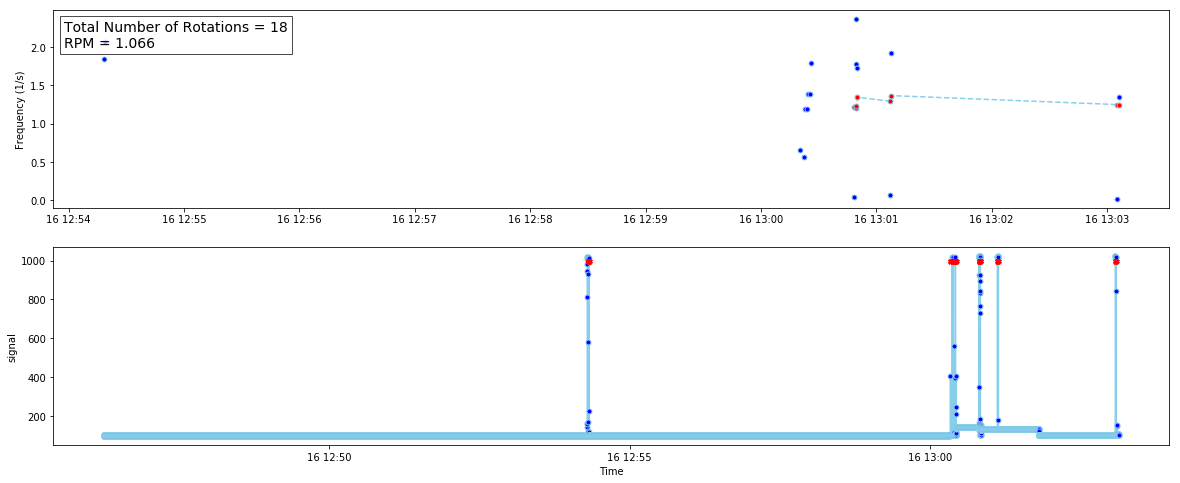

In [19]:

###Generate plots
#fig, axs = plt.subplots(2, 1)
fig, ax = plt.subplots(2,1, figsize = [20,8])
ax[0].plot(F['Time'],F['freq'],marker='o', markerfacecolor='blue', markersize=5, color='skyblue',linestyle="")
#ax[0].set_ylim(0,5)
ax[0].set_ylabel('Frequency (1/s)')
ax[0].plot(F['Time'],F['W5'],marker='o', markerfacecolor='red', markersize=5, color='skyblue',linestyle="--")
ax[1].plot(df['datetime'],df['A0'],marker='o', markerfacecolor='blue', markersize=5, color='skyblue',linestyle="-")
ax[1].plot(df['datetime'],df['peak'],marker='X', markerfacecolor='red', markersize=5, color='red')
plt.xlabel('Time')
ax[1].set_ylabel('signal')

##total number of rotations
Rotations=len(P)
TotalTime=str(df['datetime'][len(df)-1] - df['datetime'][0])
TT=TotalTime.split(':')
Minutes = float(TT[1]) + (float(TT[2])/60)
RPM=round(Rotations/Minutes, 3)
props = dict(boxstyle='square', facecolor='white', alpha=0.7)
text= 'Total Number of Rotations = ' + str(Rotations) + '\n' + 'RPM = ' + str(RPM) 
ax[0].text(0.01, 0.95, text, transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

